# ICS 474 Project **(Car Details )** 

### imports libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder

## Part 1: Data Understanding and Exploration

In [2]:

# Load the dataset
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())  # Shows feature names, data types, and non-null counts

print("\nFirst few rows of the dataset:")
print(df.head())  # Displays the first few rows of the dataset for structure overview

print("\nDataset dimensions:")
print("(Rows, Columns)", df.shape)

df.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None

First few rows of the dataset:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol  

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [3]:
# Check for missing values
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# Drop duplicates if they exist
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates have been removed.")
     # Save the updated DataFrame back to the CSV file
    # df.to_csv('CAR DETAILS FROM CAR DEKHO.csv', index=False)
else:
    print("No duplicates found.")



Missing Values in Each Column:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Number of Duplicate Rows: 763
Duplicates have been removed.


In [4]:


# Generate and print a statistical summary
print("\nStatistical Summary of Numerical Features:")
stat_summary = df.describe().round(2)
print(stat_summary)



Statistical Summary of Numerical Features:
          year  selling_price  km_driven
count  3577.00        3577.00    3577.00
mean   2012.96      473912.54   69250.55
std       4.25      509301.81   47579.94
min    1992.00       20000.00       1.00
25%    2010.00      200000.00   36000.00
50%    2013.00      350000.00   60000.00
75%    2016.00      600000.00   90000.00
max    2020.00     8900000.00  806599.00



Displaying Data Distributions for Numerical Features...


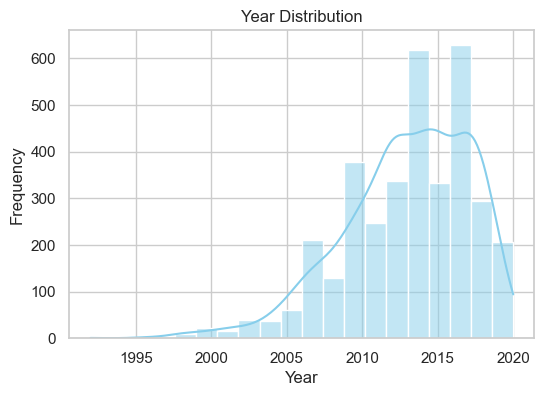

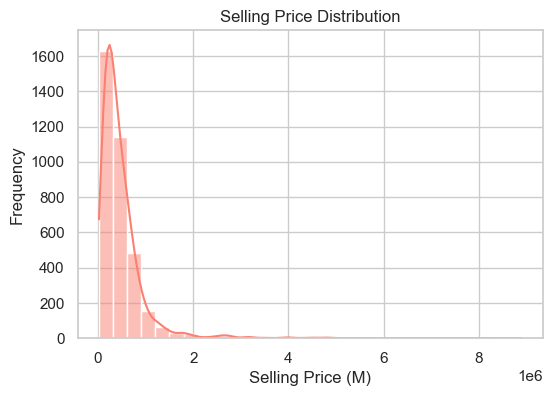

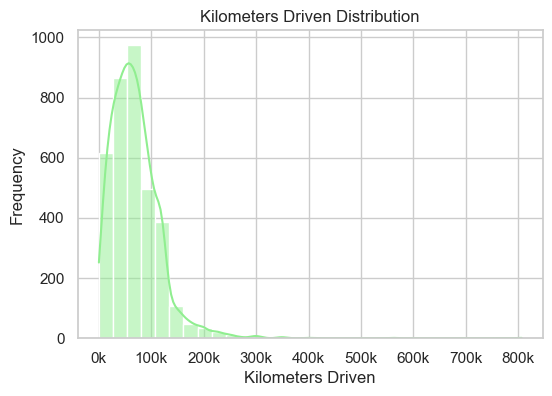

In [5]:
sns.set(style="whitegrid")

# Plot distributions for numerical features
print("\nDisplaying Data Distributions for Numerical Features...")

# Year Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['year'], bins=20, kde=True, color='skyblue')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Selling Price Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['selling_price'], bins=30, kde=True, color='salmon')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price (M)')
plt.ylabel('Frequency')
plt.show()

# Kilometers Driven Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['km_driven'], bins=30, kde=True, color='lightgreen')
plt.title('Kilometers Driven Distribution')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

# Format x-axis to show 'k' notation
def format_func(x, p):
    return f'{int(x/1000)}k'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
plt.show()

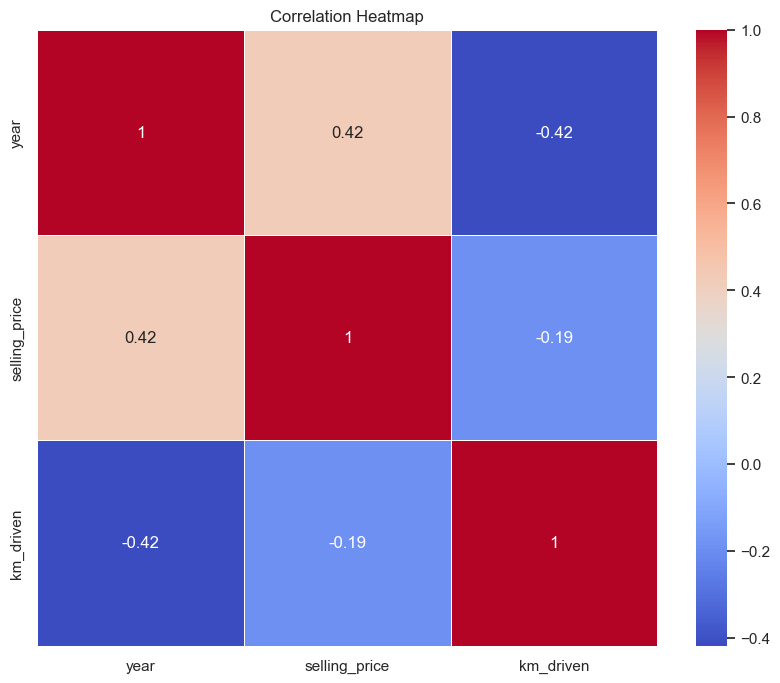

In [6]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation coefficients
correlation_matrix = numeric_df.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Kilometers Driven Outliers: 106
Selling Price Outliers: 170


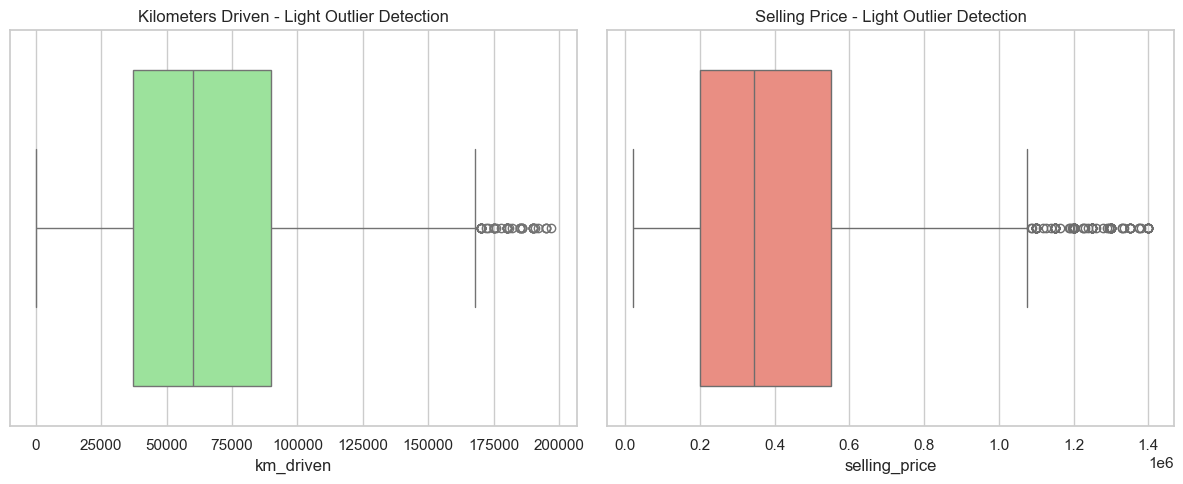

In [7]:

def outliers(feature, multiplier):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers


# Detect outliers in key features
kilometers_outliers = outliers('km_driven', 1.5)
price_outliers = outliers('selling_price', 1.5)

print("\nKilometers Driven Outliers:", len(kilometers_outliers))
print("Selling Price Outliers:", len(price_outliers))


# Apply the extreme outlier detection then remove them with multiplyer of 2
df = df.drop(outliers('km_driven', 2).index)
df = df.drop(outliers('selling_price', 2).index)
    
# Save the updated DataFrame back to the CSV file
df.to_csv('CAR DETAILS FROM CAR DEKHO.csv', index=False)

# Plot box plots to show outliers visually after removing the extreme ones
plt.figure(figsize=(12, 5))

# Box plot for kilometers driven after removing extreme outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="km_driven", color="lightgreen")
plt.title("Kilometers Driven - Light Outlier Detection")

# Box plot for selling price after removing extreme outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="selling_price", color="salmon")
plt.title("Selling Price - Light Outlier Detection")

plt.tight_layout()
plt.show()

### 
The results from the IQR analysis, shown in Figure , reveal that both "Selling Price" and "Kilometers Driven" contain outliers. These outliers likely correspond to unusual cases, such as cars with extremely high mileage or luxury vehicles with significantly higher prices.

For model stability, removing only the extreme outliers is often preferable, as this balances generalization with sensitivity to unusual data points 

## Part 2: Data Preprocessing

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encoding(df):

    print("Original columns:", df.columns.tolist())
    
    # One-hot encode 'fuel', 'seller_type', and 'transmission' columns
    # Convert float values to int (0 or 1)
    categorical_cols = ['fuel', 'seller_type', 'transmission']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
    
    # Convert float values to int for one-hot encoded columns
    for col in df.columns:
        if any(col.startswith(prefix + '_') for prefix in categorical_cols):
            df[col] = df[col].astype(int)
    
    # Define custom ordinal mapping for 'owner' to preserve hierarchy
    owner_mapping = {
        'First Owner': 0,
        'Second Owner': 1,
        'Third Owner': 2,
        'Fourth & Above Owner': 3,
        'Test Drive Car': 4
    }
    df['owner'] = df['owner'].map(owner_mapping)
    
    print("\n2. Encoded columns:", df.columns.tolist())
    
    # Drop the specified fuel columns
    columns_to_drop = ['fuel_Electric', 'fuel_CNG', 'fuel_LPG']
    df = df.drop(columns=columns_to_drop)
    
    print("\n3. Columns after dropping fuel types:")
    print(df.columns.tolist())
    
    # Print the data types of columns to verify integer encoding
    print("\n4. Data types of encoded columns:")
    print(df.dtypes)
    
    return df

if __name__ == "__main__":
    # Load the dataset
    df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
    # Process the data
    encoding_df = encoding(df)
     # Save the updated DataFrame back to the CSV file
    encoding_df.to_csv('CAR DETAILS FROM CAR DEKHO.csv', index=False)

Original columns: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']

2. Encoded columns: ['name', 'year', 'selling_price', 'km_driven', 'owner', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Automatic', 'transmission_Manual']

3. Columns after dropping fuel types:
['name', 'year', 'selling_price', 'km_driven', 'owner', 'fuel_Diesel', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Automatic', 'transmission_Manual']

4. Data types of encoded columns:
name                            object
year                             int64
selling_price                    int64
km_driven                        int64
owner                            int64
fuel_Diesel                      int64
fuel_Petrol                      int64
seller_type_Dealer               int64
seller_ty

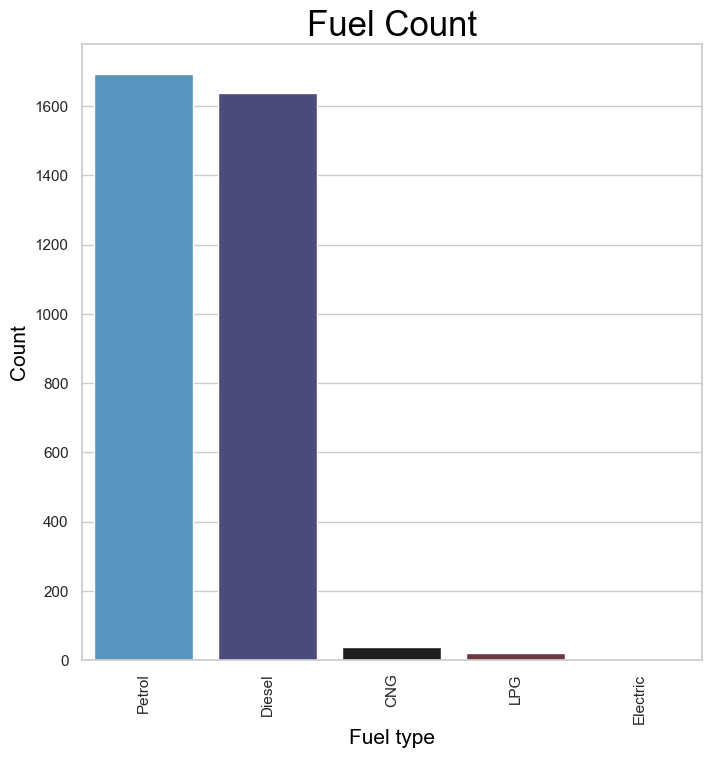

In [9]:


plt.figure(figsize=(8, 8))
sns.countplot(data=df, x="fuel", hue="fuel", palette="icefire", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel("Fuel type", fontsize=15, color="black")
plt.ylabel("Count", fontsize=15, color="black")
plt.title("Fuel Count", fontsize=25, color="black")
plt.show()


### 
Shows the count of fuel type after the preprocessing part.

CNG , LPG, and Electric has a tiny count,and they will affect our model.
As result, we remove them.

In [10]:
print("\nStatistical Summary of Numerical Features:")
stat_summary = df.describe().round(2)
print(stat_summary)


Statistical Summary of Numerical Features:
          year  selling_price  km_driven
count  3392.00        3392.00    3392.00
mean   2012.91      406610.01   66311.78
std       4.26      275928.56   38491.43
min    1992.00       20000.00       1.00
25%    2010.00      200000.00   37143.50
50%    2013.00      345000.00   60000.00
75%    2016.00      550000.00   90000.00
max    2020.00     1400000.00  197000.00


In [11]:
from sklearn.preprocessing import MinMaxScaler

def scale_features(df):
    """
    Scales numerical features using Min-Max scaling and stores the scaled values in new columns.
    """
    # Define features to scale
    features_to_scale = ['year', 'selling_price', 'km_driven']
    
    # Initialize the scaler
    scaler = MinMaxScaler()
    
    # Create new columns for scaled features
    for feature in features_to_scale:
        df[f'{feature}_scaled'] = scaler.fit_transform(df[[feature]])
    
    return df

# Apply scaling to the dataset
df = scale_features(df)

# Verify scaling
print(df.describe())

df.to_csv('CAR DETAILS FROM CAR DEKHO.csv', index=False)


              year  selling_price      km_driven  year_scaled  \
count  3392.000000   3.392000e+03    3392.000000  3392.000000   
mean   2012.912146   4.066100e+05   66311.781840     0.746862   
std       4.259561   2.759286e+05   38491.434343     0.152127   
min    1992.000000   2.000000e+04       1.000000     0.000000   
25%    2010.000000   2.000000e+05   37143.500000     0.642857   
50%    2013.000000   3.450000e+05   60000.000000     0.750000   
75%    2016.000000   5.500000e+05   90000.000000     0.857143   
max    2020.000000   1.400000e+06  197000.000000     1.000000   

       selling_price_scaled  km_driven_scaled  
count           3392.000000       3392.000000  
mean               0.280152          0.336605  
std                0.199948          0.195389  
min                0.000000          0.000000  
25%                0.130435          0.188542  
50%                0.235507          0.304565  
75%                0.384058          0.456850  
max                1.000000   

## Part 3: Modeling

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Function to evaluate models
def evaluate_models(X, y):
    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    }
    results = {}

    # Train, validate, and store performance metrics
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        
        results[name] = {
            'MAE': mean_absolute_error(y_val, y_val_pred),
            'MSE': mean_squared_error(y_val, y_val_pred),
            'R2 Score': r2_score(y_val, y_val_pred)
        }

    # Display validation metrics
    for name, metrics in results.items():
        print(f"{name} - MAE: {metrics['MAE']:.4f}, MSE: {metrics['MSE']:.4f}, R2 Score: {metrics['R2 Score']:.4f}")

    # Hyperparameter tuning for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30]
    }
    grid_search_rf = GridSearchCV(estimator=models['Random Forest Regressor'], param_grid=param_grid_rf, cv=5, scoring='r2')
    grid_search_rf.fit(X_train, y_train)

    # Best parameters and score for Random Forest
    print("Best Random Forest Parameters:", grid_search_rf.best_params_)
    print("Best Random Forest R2 Score:", grid_search_rf.best_score_)

    # Final evaluation on test set with the best Random Forest model
    best_rf_model = grid_search_rf.best_estimator_
    y_test_pred = best_rf_model.predict(X_test)

    # Final metrics
    print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
    print("Test MSE:", mean_squared_error(y_test, y_test_pred))
    print("Test R2 Score:", r2_score(y_test, y_test_pred))

# ** Evaluation for Scaled and Encoded Features **
print("For scaling and encoding columns:")
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df = encoding(df) 
df=scale_features(df)
# Define scaled feature set and target
X_scaled = df[['year_scaled', 'km_driven_scaled', 'fuel_Diesel', 'fuel_Petrol', 
               'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
               'transmission_Automatic', 'transmission_Manual', 'owner']]
y_scaled = df['selling_price_scaled']  # Scaled target variable

evaluate_models(X_scaled, y_scaled)

# ** Evaluation for Unscaled Features **
print("\nFor not scaled columns ('year', 'km_driven' and 'selling_price' only):")
# Define unscaled feature set and target
X_unscaled = df[['year', 'km_driven']]
y_unscaled = df['selling_price']  # Unscaled target variable

evaluate_models(X_unscaled, y_unscaled)


For scaling and encoding columns:
Original columns: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'year_scaled', 'selling_price_scaled', 'km_driven_scaled']

2. Encoded columns: ['name', 'year', 'selling_price', 'km_driven', 'owner', 'year_scaled', 'selling_price_scaled', 'km_driven_scaled', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Automatic', 'transmission_Manual']

3. Columns after dropping fuel types:
['name', 'year', 'selling_price', 'km_driven', 'owner', 'year_scaled', 'selling_price_scaled', 'km_driven_scaled', 'fuel_Diesel', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Automatic', 'transmission_Manual']

4. Data types of encoded columns:
name                             object
year                              int64
selling_price                 

### Car Price Prediction

This code below will ask the user **6 questions** to predict the car price. The questions are as follows:

1. **What is the car model?**  
2. **How many kilometers has the car traveled?**  
3. **What type of fuel does the car have?**  
   - Diesel  
   - Petrol  
4. **What type of seller is listing the car?**  
   - Dealer  
   - Individual  
   - Trustmark Dealer  
5. **Is the car automatic or manual?**  
6. **What is the level of the owner?**  
   - First Owner  
   - Second Owner  
   - Third Owner  
   - Fourth & Above Owner  
   - Test Drive Car  


In [16]:
import joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import warnings

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)


# Retrieve min and max values for scaling
min_max_values = {
    'year': (df['year'].min(), df['year'].max()),
    'km_driven': (df['km_driven'].min(), df['km_driven'].max()),
    'selling_price': (df['selling_price'].min(), df['selling_price'].max())
}

# Define scaled features and target
X = df[['year_scaled', 'km_driven_scaled', 'fuel_Diesel', 'fuel_Petrol', 
        'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
        'transmission_Automatic', 'transmission_Manual', 'owner']]
y = df['selling_price_scaled']

# Split data into 70% train, 15% validation, and 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "best_gb_model.pkl")

# Input dictionaries for encoding
fuel_dict = {'Diesel': [1, 0], 'Petrol': [0, 1]}
seller_dict = {'Dealer': [1, 0, 0], 'Individual': [0, 1, 0], 'Trustmark Dealer': [0, 0, 1]}
transmission_dict = {'Automatic': [1, 0], 'Manual': [0, 1]}
owner_dict = {'First': 0, 'Second': 1, 'Third': 2, 'Fourth & above': 3, 'Test drive': 4}

# Collect input from user
model_year = int(input("What is the car model year? "))
km_driven = float(input("How many kilometers did the car travel? "))
fuel = input("What type of fuel does the car have (Diesel or Petrol)? ")
seller_type = input("What type of seller (Dealer, Individual or Trustmark Dealer)? ")
transmission = input("Is the car Automatic or Manual? ")
owner_level = input("What is the level of the Owner (First, Second, Third, Fourth & above or Test drive)? ")

# Create feature array with scaled year and km_driven values
year_min, year_max = min_max_values['year']
km_min, km_max = min_max_values['km_driven']
model_year_scaled = (model_year - year_min) / (year_max - year_min)
km_driven_scaled = (km_driven - km_min) / (km_max - km_min)
features = np.array([[
    model_year_scaled,
    km_driven_scaled,
    *fuel_dict.get(fuel, [0, 0]),
    *seller_dict.get(seller_type, [0, 0, 0]),
    *transmission_dict.get(transmission, [0, 0]),
    owner_dict.get(owner_level, 0)
]])

# Predict the scaled selling price
predicted_price_scaled = model.predict(features)[0]

# Reverse the scale for selling price
selling_price_min, selling_price_max = min_max_values['selling_price']
predicted_price = predicted_price_scaled * (selling_price_max - selling_price_min) + selling_price_min

# Display the result
print(f"The predicted selling price of the car is: {predicted_price:,.2f}")

The predicted selling price of the car is: 312,510.96


### Prediction Error Calculation

#### Given Data:
- **Car Model**: 2014  
- **Price**: 290,000  
- **Km Driven**: 64,000  
- **Gas**: Petrol  
- **Seller Type**: Individual  
- **Transmission Type**: Manual  
- **Owner Level**: Second  

#### Results:
- **Actual Price**: 290,000  
- **Predicted Price**: 312,510.96  

#### Calculation:




Percentage Error= ((312,510.96 - 290,000) / 290,000) * 100 = 7.8\%


#### Conclusion:
The prediction error is **7.8%**.
